In [1]:
import ssm_read_data
import pandas
import numpy
import datetime
import aacgmv2
import matplotlib.pyplot as plt
from davitpy import utils
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
# SSM File
selSsmFile = "../data/dmsp/dmsp-f18_ssm_magnetometer_20110705_v1.0.4.cdf"
selTimeRange = [ datetime.datetime(2011,7,5,4,0),\
               datetime.datetime(2011,7,5,4,30) ]
coords = "mlt"
mapTime = datetime.datetime( 2011,7,5,4,30 )

In [3]:
def convert_to_aacgm(row):
        """
        For the SSM DF convert the 
        glat, glon and date return
        mlat, mlon and mlt
        """
        
        mlat, mlon = aacgmv2.convert(row["glat"], row["glon"],\
                           300, row["date"])
        # mlon, mlat = utils.coord_conv( row["glon." + indStr], row["glat." + indStr], \
        #                      "geo", "mag", altitude=300., \
        #                      date_time=row["date"] )
        mlt = aacgmv2.convert_mlt(mlon, row["date"], m2a=False)
        row["mlat"] = numpy.round( mlat, 2)
        row["mlon"] = numpy.round( mlon, 2)
        row["mlt"] = numpy.round( mlt, 2)
        return row

In [4]:
ssmObj = ssm_read_data.ssm_cdf_reader(selSsmFile)

In [5]:
# create a pandas DF of the data
ssmDF = pandas.DataFrame( {
    "date" : ssmObj.cdf['Epoch'][:].flatten(),
    "dB_across" : ssmObj.dB_across,
    "dB_along" : ssmObj.dB_along,
    "dB_up" : ssmObj.dB_up,
    "dBd1" : ssmObj.dBd1,
    "dBd2" : ssmObj.dBd2,
    "dBd3" : ssmObj.dBd3,
    "glat" : ssmObj.glat,
    "glon" : ssmObj.glon
} )
# filter ssmDF to required times
ssmDF = ssmDF[ (ssmDF["date"] >= selTimeRange[0]) &\
             (ssmDF["date"] <= selTimeRange[1]) ]
#convert to mlat, mlon and mlt
ssmDF = ssmDF.apply(convert_to_aacgm, axis=1)
ssmDF.head()

,dB_across,dB_along,dB_up,dBd1,dBd2,dBd3,date,glat,glon,mlat,mlon,mlt
14400,-3.658124,9.026205,3.051105,-0.372528,-11.750592,1.801920,2011-07-05 04:00:00.138,34.134041,236.685345,40.68,-58.13,19.28
14401,-3.326070,9.098945,2.729965,-0.766142,-11.506244,1.968415,2011-07-05 04:00:01.138,34.191968,236.667922,40.73,-58.16,19.27
14402,-2.999114,9.189274,2.378775,-1.162144,-11.262023,2.160282,2011-07-05 04:00:02.138,34.249894,236.650480,40.78,-58.20,19.27
14403,-3.642076,8.312086,1.997489,-0.051704,-10.416377,2.178188,2011-07-05 04:00:03.138,34.307818,236.633020,40.83,-58.23,19.27
14404,-3.360762,8.423252,2.587342,-0.419268,-10.792487,1.810658,2011-07-05 04:00:04.138,34.365743,236.615541,40.88,-58.26,19.27


In [18]:
# convert to map coords
if coords != "geo":
    ssmLats = ssmDF["mlat"].values
    if coords == "mlt":
        ssmLons = ssmDF["mlt"].values*15.
    else:
        ssmLons = ssmDF["mlon"].values
else:
    ssmLats = ssmDF["glat"].values
    ssmLons = ssmDF["glon"].values
bVecs = ssmDF["dB_across"].values

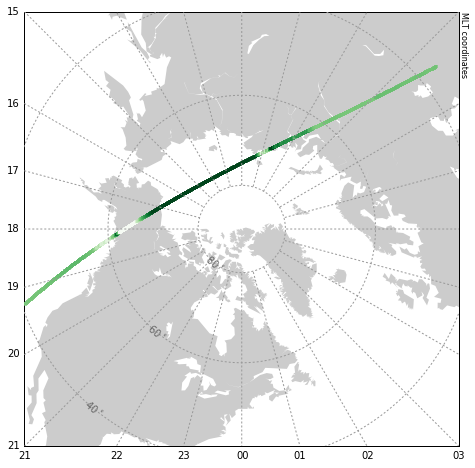

In [19]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(1,1,1)
mapHandle = utils.plotUtils.mapObj(boundinglat=40., coords=coords,\
                           lat_0=90., lon_0=0, datetime=mapTime)
xVecs, yVecs = mapHandle(ssmLons, ssmLats, coords=coords)
ssmPlot = mapHandle.scatter(xVecs, yVecs, c=bVecs, s=10.,\
                       cmap="Greens", alpha=0.7, zorder=7., \
                                 edgecolor='none', marker="s",\
                           vmin=-100., vmax=100.)

In [20]:
ssmObj.cdf.keys()

['Epoch',
 'SC_ECI',
 'SC_ECI_LABEL',
 'SC_GEOCENTRIC_LAT',
 'SC_GEOCENTRIC_LON',
 'SC_GEOCENTRIC_R',
 'SC_AACGM_LAT',
 'SC_AACGM_LON',
 'SC_AACGM_LTIME',
 'B_SC_OBS_ORIG',
 'B_SC_OBS_ORIG_LBL',
 'DELTA_B_SC_ORIG',
 'DELTA_B_SC_ORIG_LBL',
 'DELTA_B_GEO_LBL',
 'DELTA_B_APX_LBL',
 'DELTA_B_GEO',
 'DELTA_B_APX',
 'DELTA_B_SC',
 'SC_APEX_LAT',
 'SC_APEX_LON',
 'SC_APEX_MLT',
 'SC_ALONG_GEO_LABL',
 'SC_ALONG_GEO',
 'AURORAL_REGION',
 'ORBIT_INDEX',
 'DELTA_B_SC_LBL',
 'AURORAL_BOUNDARY_FOM',
 'SC_ACROSS_GEO',
 'SC_ACROSS_GEO_LABL']